1. 讀入資料，並判斷出那些數據格式不是數字，或是有缺失值。
2. 將非數字類型的資料進行編碼。
3. 填補缺失值。

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



    
inputData = pd.read_csv("HW4_house-prices.csv")
inputDataCopy = inputData.copy()
textData = inputDataCopy.select_dtypes(include='object')
numericData = inputDataCopy.drop(textData.keys(), axis=1)

for key in textData.keys():
    inputData[key].fillna("No Data", inplace=True) # fill with blank 
  
for key in numericData.keys():
    median = inputData[key].median()
    inputData[key].fillna(median, inplace=True) # fill with median number


inputDataEncode = inputData[textData.keys()].apply(LabelEncoder().fit_transform)
inputData.update(inputDataEncode)
print(inputData["Alley"])


0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    0
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    2
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Alley, Length: 1460, dtype: object


4. 將資料切割成訓練集 70%，預測集 30%。分別使用 Linear、Ridge、及 Lasso 三種 regression 模型預測 Rating，並使用 MSE（Mean-Squared-Error）作為預測準確度的指標。比較那一種模型較佳。

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

def trainPredictData(regModel):
    regModel.fit(trainData, trainLabel)
    prediction = linearReg.predict(trainData)
    linearMse = mean_squared_error(trainLabel, prediction)
    return linearMse


label = inputData["SalePrice"]
data = inputData.drop("SalePrice", axis=1)
trainData, testData, trainLabel, testLabel = train_test_split(data, label, test_size=0.3, random_state=42)
linearReg = linear_model.LinearRegression()
linearMse = trainPredictData(linearReg)
ridgeReg = linear_model.Ridge()
ridgeMse = trainPredictData(ridgeReg)
lassoReg = linear_model.Lasso()
lassoMse = trainPredictData(lassoReg)
# not yet get ratting

threeModeMseDict = {"linearMse": linearMse, "ridgeMse": ridgeMse, "lassoMse": lassoMse}
smallestMse = min(linearMse, ridgeMse, lassoMse)

key = [key for key, value in threeModeMseDict.items() if value == smallestMse]
print("Best Model: " + key[0])



Best Model: linearMse


C:\Users\BV\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5. 依據最佳結果的模型，對預測集資料繪製出預測房價 vs 實際房價 之散佈(scatter plot)圖

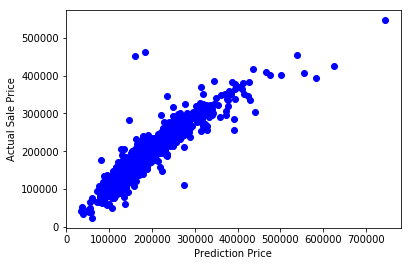

In [41]:
import matplotlib.pyplot as plt
figure = plt.figure()
axis = figure.add_subplot(111)
price = axis.scatter(trainLabel, prediction, c = 'blue')

plt.xlabel("Prediction Price")
plt.ylabel("Actual Sale Price")

plt.show()

6. 比較將特徵值進行標準化前處理後之預測準確度

In [ ]:
from sklearn.metrics import precision_score